<h1> Using MOMENT for Forecasting </h1>
<hr>

## 1.Loading MOMENT


In [ ]:
!pip install numpy pandas matplotlib tqdm
!pip install git+https://github.com/its-Pallabi/moment.git

  Cloning https://github.com/its-Pallabi/moment.git to /tmp/pip-req-build-h876oyta
  Running command git clone --filter=blob:none --quiet https://github.com/its-Pallabi/moment.git /tmp/pip-req-build-h876oyta
  Resolved https://github.com/its-Pallabi/moment.git to commit 7a6231208318fc6b855ac083a144192c15ec24aa
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.7/311.7 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 48.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-no

In [ ]:
!git clone https://github.com/its-Pallabi/moment

Cloning into 'moment'...
remote: Enumerating objects: 781, done.
remote: Counting objects: 100% (306/306), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 781 (delta 286), reused 240 (delta 240), pack-reused 475
Receiving objects: 100% (781/781), 25.03 MiB | 16.93 MiB/s, done.
Resolving deltas: 100% (501/501), done.


In [ ]:
from momentfm import MOMENTPipeline

model = MOMENTPipeline.from_pretrained(
    "AutonLab/MOMENT-1-large",
    model_kwargs={
        'task_name': 'forecasting',
        'forecast_horizon': 192,
        'head_dropout': 0.1,
        'weight_decay': 0,
        'freeze_encoder': True, # Freeze the patch embedding layer
        'freeze_embedder': True, # Freeze the transformer encoder
        'freeze_head': False, # The linear forecasting head must be trained
    },
)


/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:311: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:311: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


config.json:   0%|          | 0.00/248 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.13G [00:00<?, ?B/s]

In [ ]:
model.init()
print(model)

MOMENTPipeline(
  (normalizer): RevIN()
  (tokenizer): Patching()
  (patch_embedding): PatchEmbedding(
    (value_embedding): Linear(in_features=8, out_features=1024, bias=False)
    (position_embedding): PositionalEmbedding()
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 1024)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=1024, out_features=1024, bias=False)
              (k): Linear(in_features=1024, out_features=1024, bias=False)
              (v): Linear(in_features=1024, out_features=1024, bias=False)
              (o): Linear(in_features=1024, out_features=1024, bias=False)
              (relative_attention_bias): Embedding(32, 16)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
  

In [ ]:
print("Unfrozen parameters:")
for name, param in model.named_parameters():
    if param.requires_grad:
        print('    ', name)
if 'weight' in name:
  print(f'Weight matrix of {name}: {param.shape}')
elif 'bias' in name:
  print(f'Bias vector of {name}: {param.shape}')

Unfrozen parameters:
     head.linear.weight
     head.linear.bias
Bias vector of head.linear.bias: torch.Size([192])


###Initialization of input tensor

In [ ]:
from pprint import pprint
import torch
# takes in tensor of shape [batchsize, n_channels, context_length]
x = torch.randn(16,1,512)
print(x.shape)
output = model(x)
pprint(output)

torch.Size([16, 1, 512])
TimeseriesOutputs(forecast=tensor([[[-0.0643, -0.0889,  0.0027,  ..., -0.1365, -0.0643, -0.0993]],

        [[-0.2089,  0.0338,  0.0197,  ..., -0.0654, -0.0730,  0.0026]],

        [[ 0.0261, -0.0037,  0.1283,  ...,  0.0008,  0.0048,  0.0261]],

        ...,

        [[-0.1259,  0.0079,  0.1057,  ..., -0.0598, -0.0187,  0.0022]],

        [[-0.2278,  0.0155,  0.0632,  ..., -0.0594, -0.0417, -0.0251]],

        [[-0.2236,  0.0124,  0.1920,  ..., -0.0641,  0.0296,  0.0296]]],
       grad_fn=<AddBackward0>),
                  anomaly_scores=None,
                  logits=None,
                  labels=None,
                  input_mask=tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        ...,
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.]]),
                  pretrain_mask=None,
                  reconstruction=None,
  

In [ ]:
import numpy as np
import torch
import torch.cuda.amp
from torch.utils.data import DataLoader
from torch.optim.lr_scheduler import OneCycleLR
from tqdm import tqdm

from momentfm.utils.utils import control_randomness
from momentfm.data.informer_dataset import InformerDataset
from momentfm.utils.forecasting_metrics import get_forecasting_metrics

# Set random seeds for PyTorch, Numpy etc.
control_randomness(seed=13)

# Load data
train_dataset = InformerDataset(data_split="train", random_seed=13, forecast_horizon=192)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)

test_dataset = InformerDataset(data_split="test", random_seed=13, forecast_horizon=192)
# Check the length of the train dataset
print(f"Length of train dataset: {len(train_dataset)}")
# Check the length of the test dataset
print(f"Length of test dataset: {len(test_dataset)}")
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=True)

criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

cur_epoch = 0
max_epoch = 1

# Move the model to the GPU
model = model.to(device)

# Move the loss function to the GPU
criterion = criterion.to(device)

# Enable mixed precision training
scaler = torch.cuda.amp.GradScaler()

# Create a OneCycleLR scheduler
max_lr = 1e-4
total_steps = len(train_loader) * max_epoch
scheduler = OneCycleLR(optimizer, max_lr=max_lr, total_steps=total_steps, pct_start=0.3)

# Gradient clipping value
max_norm = 5.0

while cur_epoch < max_epoch:
    losses = []
    for timeseries, forecast, input_mask in tqdm(train_loader, total=len(train_loader)):
        # Move the data to the GPU
        timeseries = timeseries.float().to(device)

        input_mask = input_mask.to(device)

        forecast = forecast.float().to(device)

        with torch.cuda.amp.autocast():
            output = model(timeseries, input_mask)

        loss = criterion(output.forecast, forecast)

        # Scales the loss for mixed precision training
        scaler.scale(loss).backward()

        # Clip gradients
        scaler.unscale_(optimizer)
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm)

        scaler.step(optimizer)
        scaler.update()
        optimizer.zero_grad(set_to_none=True)

        losses.append(loss.item())

    losses = np.array(losses)
    average_loss = np.average(losses)
    print(f"Epoch {cur_epoch}: Train loss: {average_loss:.3f}")

    # Step the learning rate scheduler
    scheduler.step()
    cur_epoch += 1

    # Evaluate the model on the test split
    trues, preds, histories, losses = [], [], [], []
    model.eval()
    with torch.no_grad():
        for timeseries, forecast, input_mask in tqdm(test_loader, total=len(test_loader)):
        # Move the data to the GPU
            timeseries = timeseries.float().to(device)
            input_mask = input_mask.to(device)
            forecast = forecast.float().to(device)

            with torch.cuda.amp.autocast():
                output = model(timeseries, input_mask)

            loss = criterion(output.forecast, forecast)
            losses.append(loss.item())

            trues.append(forecast.detach().cpu().numpy())
            preds.append(output.forecast.detach().cpu().numpy())
            histories.append(timeseries.detach().cpu().numpy())

    losses = np.array(losses)
    average_loss = np.average(losses)
    model.train()

    trues = np.concatenate(trues, axis=0)
    preds = np.concatenate(preds, axis=0)
    histories = np.concatenate(histories, axis=0)

    metrics = get_forecasting_metrics(y=trues, y_hat=preds, reduction='mean')

    print(f"Epoch {cur_epoch}: Test MSE: {metrics.mse:.3f} | Test MAE: {metrics.mae:.3f}")


Length of test dataset: 2689


100%|██████████| 993/993 [04:24<00:00,  3.75it/s]


Epoch 0: Train loss: 0.602


100%|██████████| 337/337 [01:29<00:00,  3.75it/s]

Epoch 1: Test MSE: 0.338 | Test MAE: 0.309


In [ ]:
print(forecast)

tensor([[[ 1.0590,  0.9889,  0.7786,  ...,  1.1291,  1.1291,  1.1291],
         [ 1.6060,  1.6060,  1.6858,  ...,  1.0474,  1.1272,  1.2868],
         [-1.4719, -1.4719, -1.5752,  ..., -0.7487, -0.7487, -0.8520],
         ...,
         [-0.0732, -0.0732, -0.0732,  ..., -0.0732, -0.0732, -0.0732],
         [-0.1493, -0.1493, -0.1493,  ..., -0.1493, -0.1493, -0.1493],
         [ 0.1488,  0.1595,  0.0950,  ..., -0.1091, -0.1306, -0.0984]]],
       device='cuda:0')


###  Visualization

Next, let's visualize the forecasts for a sample from the and compare it with the ground truth forecast for the given time series.

trues: [-0.31333968 -0.24879904 -0.12899677 -0.00919452  0.11060774  0.19350018
  0.2763926   0.34093326 -0.42406914 -0.46097896 -0.52551955 -0.50716776
 -0.48881596 -0.5069616  -0.44242093 -0.32261866 -0.23972623 -0.52551955
 -0.50716776 -0.5069616  -0.52551955 -0.50716776 -0.48881596 -0.5069616
 -0.47933075 -0.47933075 -0.41479012 -0.3778803  -0.31333968 -0.24879904
 -0.21188922 -0.19353741 -0.52551955 -0.5069616  -0.44242093 -0.52551955
 -0.47933075 -0.41479012 -0.3502495  -0.31333968 -0.52551955 -0.50716776
 -0.49788877 -0.47933075 -0.44242093 -0.52551955 -0.50716776 -0.48881596
 -0.45190614 -0.41499633 -0.5069616  -0.47933075 -0.47933075 -0.5069616
 -0.46097896 -0.3780865  -0.31354588 -0.27663606 -0.23972623 -0.22137442
 -0.1844646  -0.1661128  -0.52551955 -0.5069616  -0.52551955 -0.50716776
 -0.52551955 -0.50716776 -0.5345924  -0.5162406  -0.49788877 -0.47953695
 -0.46118516 -0.5069616  -0.47933075 -0.5069616  -0.46097896 -0.3780865
 -0.29519406 -0.19374362 -0.12920298 -0.0277525

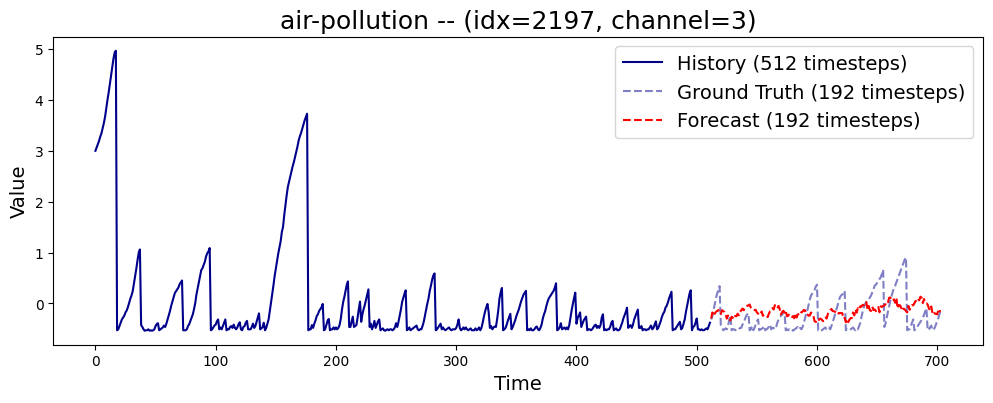

In [ ]:
import matplotlib.pyplot as plt

# Assuming histories, trues, and preds are your lists containing the data
# Extracting the first data point

channel_idx = 3#np.random.randint(0, 7) # There are 7 channels in this dataset
time_index = 2197#np.random.randint(0, trues.shape[0])

history = histories[time_index, channel_idx, :]
true = trues[time_index, channel_idx, :]
pred = preds[time_index, channel_idx, :]
print("trues:",true)
print("predictions",pred)

plt.figure(figsize=(12, 4))

# Plotting the first time series from history
plt.plot(range(len(history)), history, label='History (512 timesteps)', c='darkblue')

# Plotting ground truth and prediction
num_forecasts = len(true)

offset = len(history)
plt.plot(range(offset, offset + len(true)), true, label='Ground Truth (192 timesteps)', color='darkblue', linestyle='--', alpha=0.5)
plt.plot(range(offset, offset + len(pred)), pred, label='Forecast (192 timesteps)', color='red', linestyle='--')

plt.title(f"air-pollution -- (idx={time_index}, channel={channel_idx})", fontsize=18)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend(fontsize=14)
plt.show()

In [ ]:
print(len(true))
print(len(pred))

192
192


### Results Interpretation: MOMENT Performs Well for Forecasting in Limited Supervision Settings

Here, we can see that MOMENT **trained for 1 epoch only, without any hyperparameter tuning**, can forecast time series well!

In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate MSE for each prediction in 'preds' and then average
mse_values = []
for i in range(preds.shape[0]):
    for j in range(preds.shape[1]):
        mse_values.append(mean_squared_error(trues[i, j, :], preds[i, j, :]))

# Calculate the average MSE
average_mse = sum(mse_values) / len(mse_values)
print(f"Average Mean Squared Error (MSE): {average_mse}")

Average Mean Squared Error (MSE): 0.3384499480987171
